In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
caminho_arquivo = r'C:\Users\082200005\Downloads\Rio Araí.xlsx'

df = pd.read_excel(caminho_arquivo)

print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\082200005\\Downloads\\Rio Araí.xlsx'

In [4]:
pip install numpy pandas tensorflow scikit-learn

                                              0.0/385.0 MB ? eta -:--:--
                                              0.3/385.0 MB 5.7 MB/s eta 0:01:08
                                              0.7/385.0 MB 9.2 MB/s eta 0:00:42
                                             1.3/385.0 MB 10.6 MB/s eta 0:00:37
                                             1.9/385.0 MB 10.3 MB/s eta 0:00:38
                                             2.6/385.0 MB 10.9 MB/s eta 0:00:35
                                             3.2/385.0 MB 11.3 MB/s eta 0:00:34
                                             3.8/385.0 MB 12.2 MB/s eta 0:00:32
                                             4.4/385.0 MB 11.8 MB/s eta 0:00:33
                                             5.0/385.0 MB 12.3 MB/s eta 0:00:31
                                             5.6/385.0 MB 12.0 MB/s eta 0:00:32
                                             6.1/385.0 MB 12.2 MB/s eta 0:00:31
                                             6.


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


In [6]:
data = {
    "Data_Hora": pd.date_range(start="13/01/2022", periods=192, freq='15min'),
    "Nível (cm)": np.random.randint(160, 180, size=192),
    "Vazão (m³/s)": np.random.uniform(600, 700, size=192),
    "Chuva (mm)": np.random.uniform(0, 10, size=192)
}
df = pd.DataFrame(data)

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Data_Hora']))  # Remove a coluna Data_Hora
print(f'Tamanho de scaled_data: {scaled_data.shape}')  # Deve ser (192, 3)

Tamanho de scaled_data: (192, 3)


In [8]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])  # Dados de 24h
        y.append(data[i + time_step - 1, 0])  # Nível (cm) é a primeira coluna
    
    return np.array(X), np.array(y)

In [9]:
time_step = 96  # 24h de dados
X, y = create_dataset(scaled_data, time_step)

In [10]:
print(f'Dimensão X: {X.shape}')
print(f'Dimensão y: {y.shape}')

Dimensão X: (96, 96, 3)
Dimensão y: (96,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo MLP
model = keras.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Previsão do nível do rio
])

c:\Users\quila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3459 
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.1127 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0792
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0712
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0663
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0470 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0381  
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0253 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0363
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0191
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0103
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.0098
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076  
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0052
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - 

In [14]:
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1252
Loss: 0.12518812716007233


In [15]:
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [16]:
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1)))))
predictions = predictions[:, 0]

In [17]:
real_values = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1)))))
real_values = real_values[:, 0] 

In [18]:
print(f'Tamanho de Predictions: {predictions.shape}')
print(f'Tamanho de Real Values: {real_values.shape}') 

Tamanho de Predictions: (20,)
Tamanho de Real Values: (20,)


In [19]:
comparison_df = pd.DataFrame({
    'Previsão': predictions,
    'Real': real_values
})

print(comparison_df)

      Previsão   Real
0   171.529892  171.0
1   172.307067  172.0
2   169.864254  174.0
3   168.400450  169.0
4   169.039829  174.0
5   175.899542  178.0
6   167.224359  161.0
7   176.173153  173.0
8   169.649242  179.0
9   166.838268  177.0
10  167.725690  168.0
11  166.521982  169.0
12  167.685275  164.0
13  163.480399  177.0
14  170.973392  179.0
15  176.780155  166.0
16  165.715943  178.0
17  170.275290  172.0
18  166.956391  164.0
19  168.465651  160.0


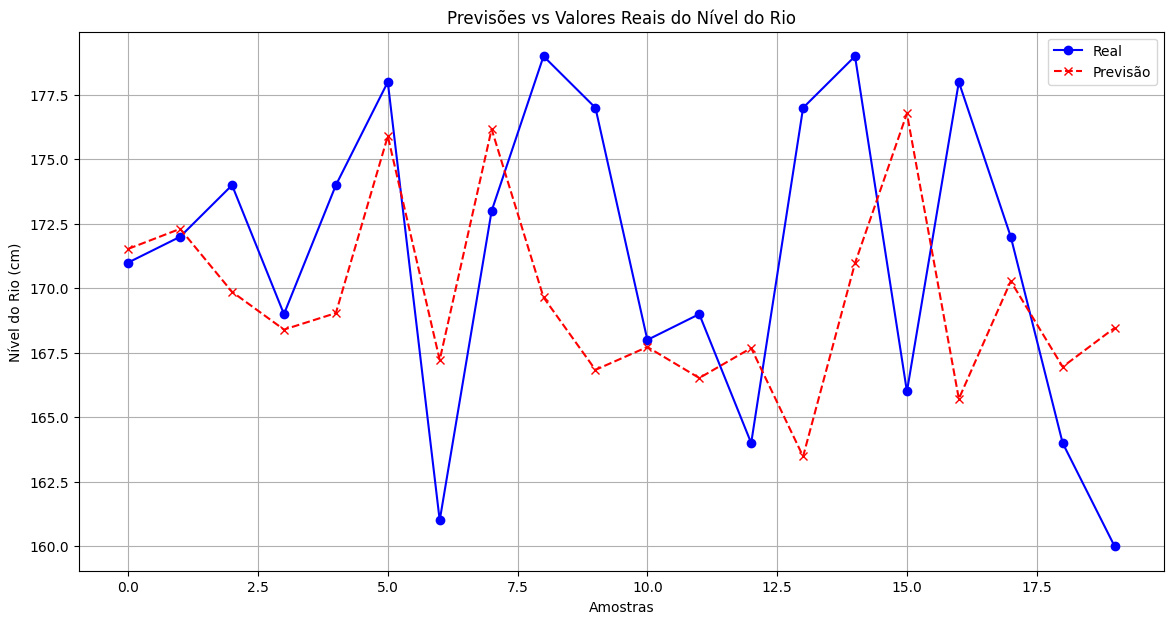

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Real'], label='Real', color='blue', marker='o')
plt.plot(comparison_df.index, comparison_df['Previsão'], label='Previsão', color='red', linestyle='--', marker='x')
plt.title('Previsões vs Valores Reais do Nível do Rio')
plt.xlabel('Amostras')
plt.ylabel('Nível do Rio (cm)')
plt.legend()
plt.grid()
plt.show()

In [21]:
mae = np.mean(np.abs(predictions - real_values))  # Erro Absoluto Médio
rmse = np.sqrt(np.mean((predictions - real_values) ** 2))  # Raiz do Erro Quadrático Médio

print(f'Erro Absoluto Médio (MAE): {mae:.2f} cm')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f} cm')

Erro Absoluto Médio (MAE): 5.29 cm
Raiz do Erro Quadrático Médio (RMSE): 6.72 cm
